# Regression 
_Weitere Informationen sind im Code in den mit # markierten Zeilen zu finden_

### Installationen

In [1]:
!pip install scipy 
!pip install sklearn

### Versionsabfrage

In [2]:
import sklearn
print(sklearn.__version__)
import scipy
print(scipy.__version__)

0.21.1
1.2.1


## Die Imports

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline


## Verkettung der Trainingsdaten

In [4]:
# concatenate data

path="/Users/jakob/Dokumente/Schule/Jahresarbeit/Projekte/ParticulateMatterAnalysis/data/StuttgartCsvDone/"
cols2drop = ['Uhrzeit-','UVA-Str. (W/m²)-Mittel', 'UVB-Str. (W/m²)-Mittel', 'Str.-Bilanz (W/m²)-Mittel', 'PM2.5 (µg/m³)-Mittel', 'SO2 (µg/m³)-Mittel', 'CO (mg/m³)-Mittel','NO (µg/m³)-Mittel','NO2 (µg/m³)-Mittel','O3 (µg/m³)-Mittel','Globalstr. (W/m²)-Mittel']

df = pd.DataFrame()

for y in range(2018,2010,-1):
    if y == 2000 or y == 2001:
        continue
    
    # Folgende Prozesse werden für jedes Jahr nacheinander durchgeführt
    
    # Jahr wird ausgegeben
    print ("\n***year:%d" %y)
    dfx = pd.read_csv(path + "Halbstd-Werte-Stuttgart-Mitte-SZ_%s_D.csv" % (str(y)), index_col=[0], sep = ";")
    
    # unnötige Spalten aussortieren
    for col in cols2drop:
        if col in dfx:
            dfx = dfx.drop(col, axis=1)


    # Spaltenname mit Summe der nicht gefüllten Zellen werden ausgegeben
    print(dfx.isna().sum())#
    # Anzahl der neu hinzgefügten Spalten wird ausgegeben
    print(" new:%d" %len(dfx))

    
    df = pd.concat([df,dfx], sort=False)
    # Anzahl der insgesammten Spalten wird ausgegeben
    print(" len:%d" %len(df))
    




***year:2018
Temp. (°C)-Mittel            0
Temp. (°C)-Max               0
Temp. (°C)-Min               0
Feuchte (%)-Mittel           0
WG (m/s)-Mittel              0
WG (m/s)-Max                 0
WR (Grad)-Mittel             0
Druck (hPa)-Mittel           0
Niederschlag (l/m²)-Summe    0
PM10 (µg/m³)-Mittel          0
dtype: int64
 new:17520
 len:17520

***year:2017
Temp. (°C)-Mittel               6
Temp. (°C)-Max               1493
Temp. (°C)-Min               1853
Feuchte (%)-Mittel              6
WG (m/s)-Mittel                 1
WG (m/s)-Max                    1
WR (Grad)-Mittel                1
Druck (hPa)-Mittel              1
Niederschlag (l/m²)-Summe       1
PM10 (µg/m³)-Mittel            77
dtype: int64
 new:17520
 len:35040

***year:2016
Temp. (°C)-Mittel               20
Temp. (°C)-Max               10224
Temp. (°C)-Min               16816
Feuchte (%)-Mittel              19
WG (m/s)-Mittel                 19
WG (m/s)-Max                 10224
WR (Grad)-Mittel            

### Zahlen konvertieren
die daten , als  und nicht . als Dezimaltrennzeichen verwendet wird, muss das geändert werden

In [5]:
df = df.convert_objects(convert_numeric=True)
df.dtypes

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Temp. (°C)-Mittel            float64
Temp. (°C)-Max               float64
Temp. (°C)-Min               float64
Feuchte (%)-Mittel           float64
WG (m/s)-Mittel              float64
WG (m/s)-Max                 float64
WR (Grad)-Mittel             float64
Druck (hPa)-Mittel           float64
Niederschlag (l/m²)-Summe    float64
PM10 (µg/m³)-Mittel          float64
dtype: object

## Dropna
alle Zeilen, welche ungefüllte Zellen haben werden aussortiert

NaN = Leer ( leere Zelle wird automatisch vom Programm mit NaN gefüllt) 

NaN Bed.: not a number

In [6]:
print(df.isna().sum())
df1 = df.dropna(axis=0)
# Spaltenname mit Summe der nicht gefüllten Zellen werden ausgegeben
print("\nlen       : %6d" %len(df))
# Anzahl der Zeilen ohne NaN Werte
print("len-non-na: %6d" %len(df1))
print("removed   : %6d" %(len(df)-len(df1)))

Temp. (°C)-Mittel              556
Temp. (°C)-Max               19253
Temp. (°C)-Min               26119
Feuchte (%)-Mittel             471
WG (m/s)-Mittel                380
WG (m/s)-Max                 17769
WR (Grad)-Mittel              2272
Druck (hPa)-Mittel            1293
Niederschlag (l/m²)-Summe     2092
PM10 (µg/m³)-Mittel          36455
dtype: int64

len       : 140256
len-non-na:  79711
removed   :  60545


## Zeit
die Zeit in eine Zahl, welche linear steigt uund am aktuellsten Datum den höchsten Wert hat

In [7]:
df1['Epochs'] = df1.index.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timestamp())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Beispiel

In [8]:
dateStr='2018-01-01 00:30:00'
date1 = datetime.strptime(dateStr, '%Y-%m-%d %H:%M:%S')
date1.timestamp()

1514763000.0

### Die Testdaten weden beschrieben 

In [9]:
df1.describe()

,Temp. (°C)-Mittel,Temp. (°C)-Max,Temp. (°C)-Min,Feuchte (%)-Mittel,WG (m/s)-Mittel,WG (m/s)-Max,WR (Grad)-Mittel,Druck (hPa)-Mittel,Niederschlag (l/m²)-Summe,PM10 (µg/m³)-Mittel,Epochs
count,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,79711.000000,7.971100e+04
mean,11.928124,12.353125,11.522381,66.204076,1.850105,4.025305,190.914529,985.458851,0.028361,18.350255,1.405018e+09
std,7.754769,7.878755,7.648805,18.232736,0.958698,2.238409,92.939767,7.572713,0.208865,13.843314,8.095014e+07
min,-12.450000,-11.810000,-13.120000,14.540000,0.000000,0.200000,0.000000,945.000000,0.000000,-34.880000,1.293838e+09
25%,5.940500,6.242000,5.617000,52.240000,1.200000,2.455000,115.900000,981.200000,0.000000,10.100000,1.335063e+09
50%,11.590000,11.920000,11.200000,69.640000,1.685000,3.483000,215.300000,985.900000,0.000000,15.850000,1.397939e+09
75%,17.620000,18.100000,17.170000,81.680000,2.300000,5.051000,243.000000,990.400000,0.000000,23.870000,1.490903e+09
max,36.850000,38.240000,36.190000,97.300000,9.768000,24.440000,360.000000,1007.000000,12.710000,966.100000,1.546297e+09


## Imoport des Programms der Reargression 

In [10]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

## Die Regression

In [11]:

import sys
cols = ['Epochs','Temp. (°C)-Mittel','Feuchte (%)-Mittel', 'WG (m/s)-Mittel',
        'Druck (hPa)-Mittel', 'Niederschlag (l/m²)-Summe']
cols1 = ['Temp. (°C)-Mittel']
# gegebene Daten 
X = pd.DataFrame(df1[cols])
# prognostizierte Daten
y = pd.DataFrame(df1['PM10 (µg/m³)-Mittel'])


methods = [HistGradientBoostingRegressor(max_iter=5000)]
bestScore = 0

for model in methods:
    sys.stdout.write(type(model).__name__ +": ")
    scores = []
    
    # testmenge wird in 5 Teile gespalten
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    for i, (train, test) in enumerate(kfold.split(X, y)):
      sys.stdout.write(".")
      model.fit(X.iloc[train,:], y.iloc[train,:].values.ravel())
        
      
      # der beste score wird ermittelt, ausgegeben und gespeichert  
      score = model.score(X.iloc[test,:], y.iloc[test,:].values.ravel())
      if score > bestScore:
        bestModel = model
      scores.append(score)

    print(scores)
    


HistGradientBoostingRegressor: .....[0.6258083105233292, 0.6793349971436111, 0.6610759128420445, 0.6241389142806117, 0.6559035986853833]


### Erklärung Output Regression

Die Testdaten werden in 5 seperate Datensetze geteilt. Aus jeweils vier der Datensätze wird eine Korrelation aus den gegebenen Daten x und zu prognostizerten Daten y erstellt und an dem 5. Datensatz getestet. Dieser Vorgang wird in allen möglichen Optionen ( also 5) durchgeführt. Der die beste der Korrelationen wird verwendet um Vorhersageb zu treffen.

Name des Regressionsmodelles.....     [1.Korrelation        2.Korrelation       3.Korrelation     4.Korrelation 5.Korrelation]

HistGradientBoostingRegressor: .....[0.6258083105233292, 0.6793349971436111, 0.6610759128420445, 0.6241389142806117, 0.6559035986853833]

## Vorhersage 
Vorhersage für PM10 Werte aus einer

Zeit,

Temperatur in Grad C

Feuchtigkeit in %

Windgeschwindigkeit in kmh

Druck in hPa (Normalfall wäre etwa 1010 hPa)

Niederschlag in l/m²

In [12]:

# Daum wird umgerechnet
#        datum und Uhrzeit 
dateStr='2019-06-01 08:30:00'
date1 = datetime.strptime(dateStr, '%Y-%m-%d %H:%M:%S')
date2 = date1.timestamp()
print(date2)


#                         Epochs,Temp.,Feucht.,WG,Druck,Nied.

blubb = bestModel.predict([[date2,   15,   30,40, 1010,    0]])
print("%.3f µg/m³ " %(blubb))

1559370600.0
4.289 µg/m³ 


## Temperatur zu PM10

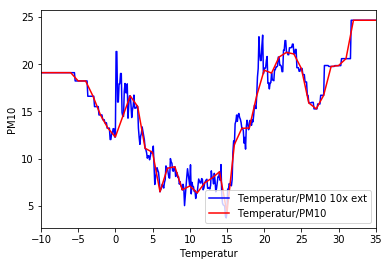

In [14]:

tempDi     = []
tempX      = []

staSto = np.arange(-10,45,0.1)
for X in staSto:
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,X,30,20,1010,0]])
    stri = float(modPred)
    tempDi.append(stri)
    tempX.append(X)
    
#print("tempDi: %s" %(tempDi)) 

tempDi2     = []
tempX2      = []

staSto = np.arange(-10,45,1)
for X in staSto:
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,X,30,20,1010,0]])
    stri = float(modPred)
    tempDi2.append(stri)
    tempX2.append(X)

plt.plot(tempX, tempDi, color= "blue")    
plt.plot(tempX2, tempDi2, color= "red")
plt.legend(['Temperatur/PM10 10x ext','Temperatur/PM10'], loc=4)
plt.xlabel("Temperatur")
plt.ylabel("PM10")

axes = plt.gca()
axes.set_xlim([-10,35])

plt.savefig("tempToPM10.svg")

## Feuchtigkeit zu PM10

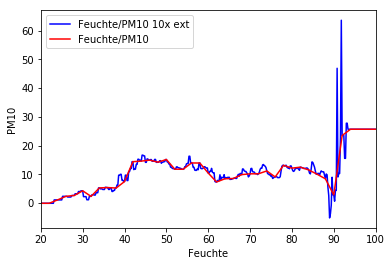

In [15]:
feuchtDi   = []
feuchtX    = []


for X in np.arange(0,110,0.2):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,X,20,1010,0]])
    stri = float(modPred)
    feuchtDi.append(stri)
    feuchtX.append(X)
#print("feuchtDi: %s" %(feuchtDi))

feuchtDi2   = []
feuchtX2    = []


for X in np.arange(0,110,2):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,X,20,1010,0]])
    stri = float(modPred)
    feuchtDi2.append(stri)
    feuchtX2.append(X)

plt.plot(feuchtX, feuchtDi, color= "blue")
plt.plot(feuchtX2, feuchtDi2, color= "red")
plt.legend(['Feuchte/PM10 10x ext', 'Feuchte/PM10'], loc=2)
plt.xlabel("Feuchte")
plt.ylabel("PM10")

axes = plt.gca()
axes.set_xlim([20,100])

plt.savefig("feuchtToPM10.svg")

## Windgeschwindigkeit zu PM10

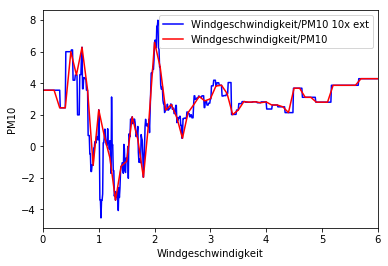

In [16]:
wgDi       = []
wgX        = []

for X in np.arange(0,10,0.01):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,30,X,1010,0]])
    stri = float(modPred)
    wgDi.append(stri)
    wgX.append(X)
    
#print("wgDi: %s" %(wgDi)) 

wgDi2       = []
wgX2        = []

for X in np.arange(0,10,0.1):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,30,X,1010,0]])
    stri = float(modPred)
    wgDi2.append(stri)
    wgX2.append(X)
    


plt.plot(wgX,wgDi, color= "blue")
plt.plot(wgX2,wgDi2, color= "red")
plt.legend(['Windgeschwindigkeit/PM10 10x ext','Windgeschwindigkeit/PM10'], loc=1)
plt.xlabel("Windgeschwindigkeit")
plt.ylabel("PM10")

axes = plt.gca()
axes.set_xlim([0,6])

plt.savefig("WGToPM10.svg")

## Druck zu PM10

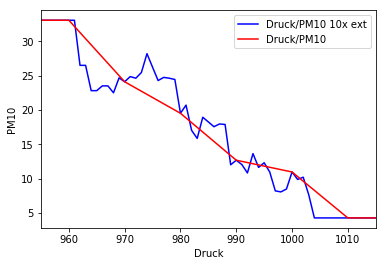

In [17]:
druckDi    = []  
druckX     = []

for X in np.arange(940,1050,1):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,30,20,X,0]])
    stri = float(modPred)
    druckDi.append(stri)
    druckX.append(X)
    
#print("druckDi: %s" %(druckDi)) 

druckDi2    = []  
druckX2     = []

for X in np.arange(940,1050,10):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,30,20,X,0]])
    stri = float(modPred)
    druckDi2.append(stri)
    druckX2.append(X)
    


plt.plot(druckX, druckDi, color= "blue")
plt.plot(druckX2, druckDi2, color= "red")
plt.legend(['Druck/PM10 10x ext', 'Druck/PM10'], loc=1)
plt.xlabel("Druck")
plt.ylabel("PM10")

axes = plt.gca()
axes.set_xlim([955,1015])

plt.savefig("DruckToPM10.svg")

## Niederschlag zu PM10

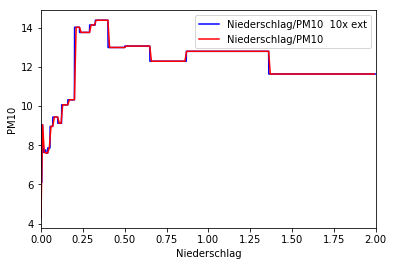

In [31]:
niedDi     = []
niedX      = []

for X in np.arange(0,2,0.001):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,30,20,1010,X]])
    stri = float(modPred)
    niedDi.append(stri)
    niedX.append(X)
    
#print("niedDi: %s" %(niedDi)) 

niedDi2     = []
niedX2      = []

for X in np.arange(0,2,0.01):
    date3 = 1559370600.0
    modPred = bestModel.predict([[date3,15,30,20,1010,X]])
    stri = float(modPred)
    niedDi2.append(stri)
    niedX2.append(X)
 

plt.plot(niedX, niedDi, color= "blue")
plt.plot(niedX2, niedDi2, color= "red")
plt.legend(['Niederschlag/PM10  10x ext', 'Niederschlag/PM10'], loc=1)
plt.xlabel("Niederschlag")
plt.ylabel("PM10")

axes = plt.gca()
axes.set_xlim([0,2])


plt.savefig("niedToPM10.svg")